In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Show plots inline
%matplotlib inline

# Load the data (update filename if needed)
df = pd.read_csv("../data/heart.csv")

df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.shape

(920, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [9]:
# Example: drop rows with missing values (if very few)
df_clean = df.dropna().copy()

df_clean.shape


(299, 16)

In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [11]:
df.duplicated().sum()
df = df.drop_duplicates()


In [12]:
df.columns.tolist()


['id',
 'age',
 'sex',
 'dataset',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [13]:
# Create binary target column
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Check distribution
df['target'].value_counts()


target
1    509
0    411
Name: count, dtype: int64

In [14]:
df['target'].value_counts(normalize=True) * 100

target
1    55.326087
0    44.673913
Name: proportion, dtype: float64

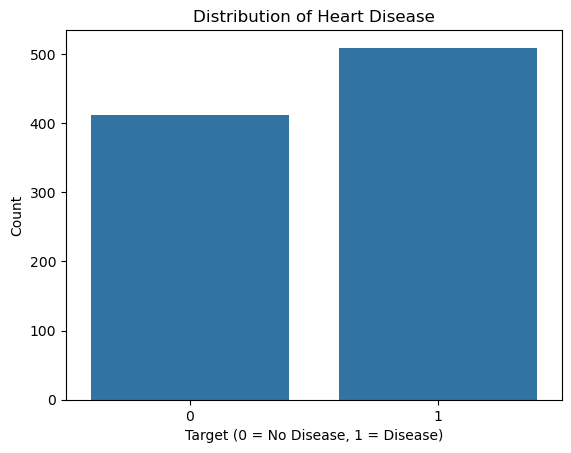

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

In [16]:
df = df.drop(columns=['id', 'dataset', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [17]:
df.isnull().sum()


age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
target        0
dtype: int64

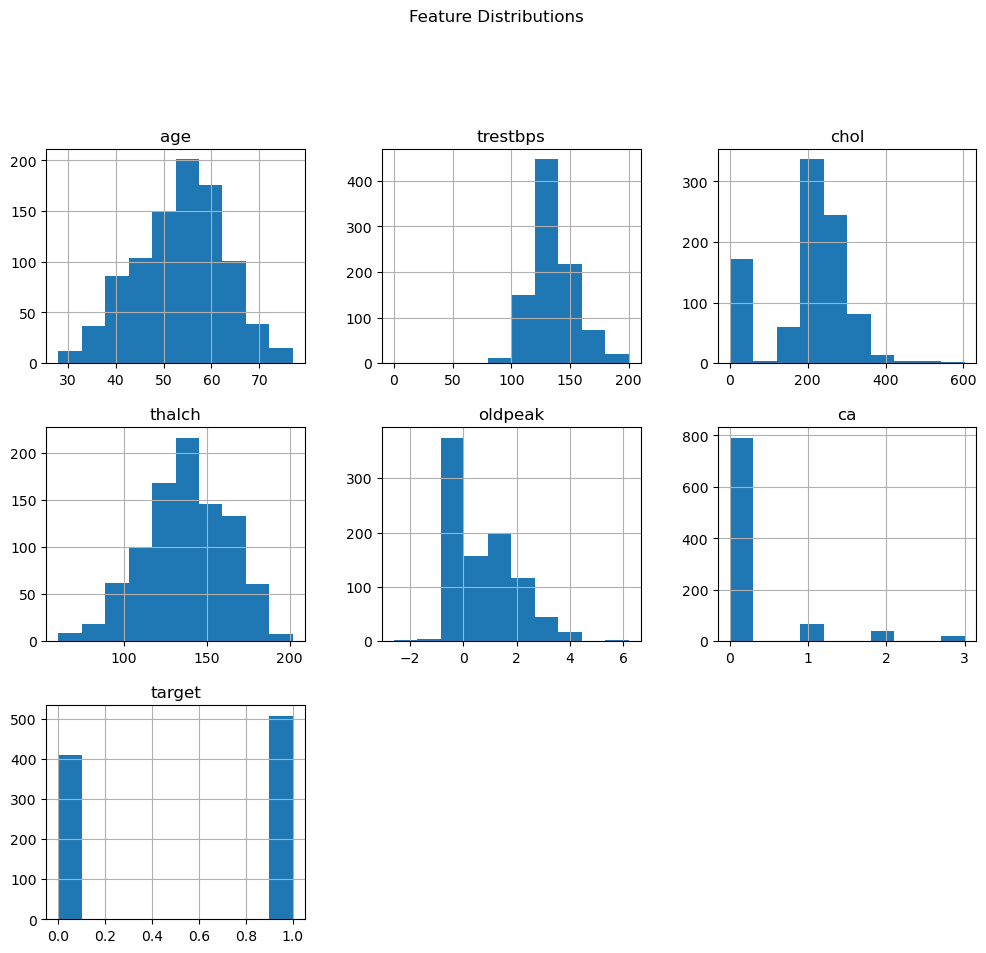

In [18]:
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()


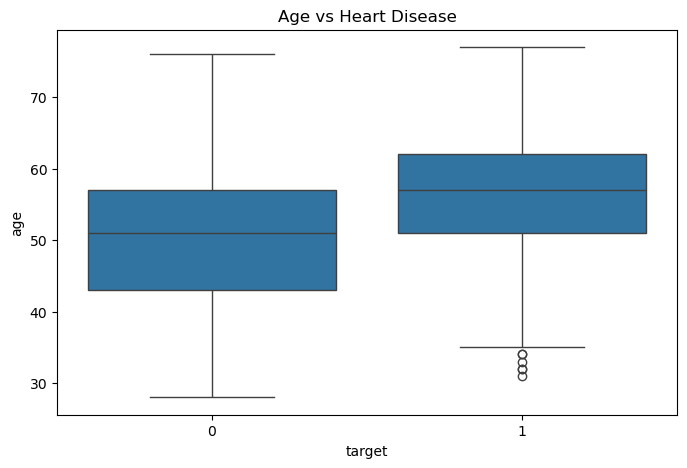

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()


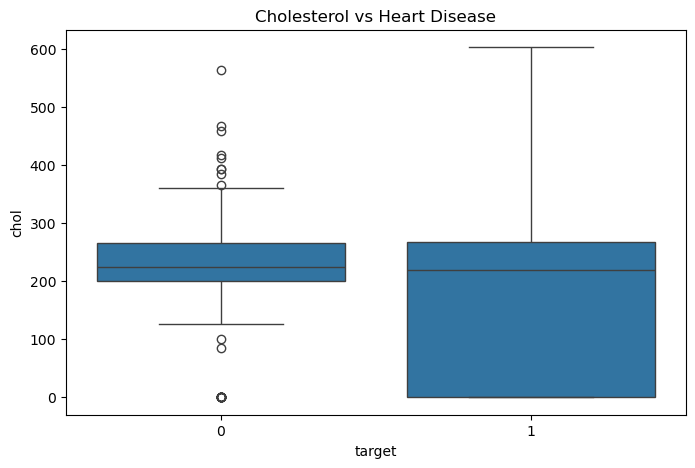

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()


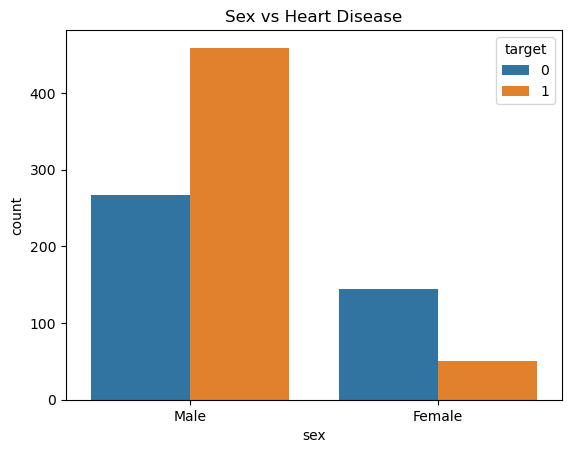

In [21]:
sns.countplot(x='sex', hue='target', data=df)
plt.title("Sex vs Heart Disease")
plt.show()


In [24]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


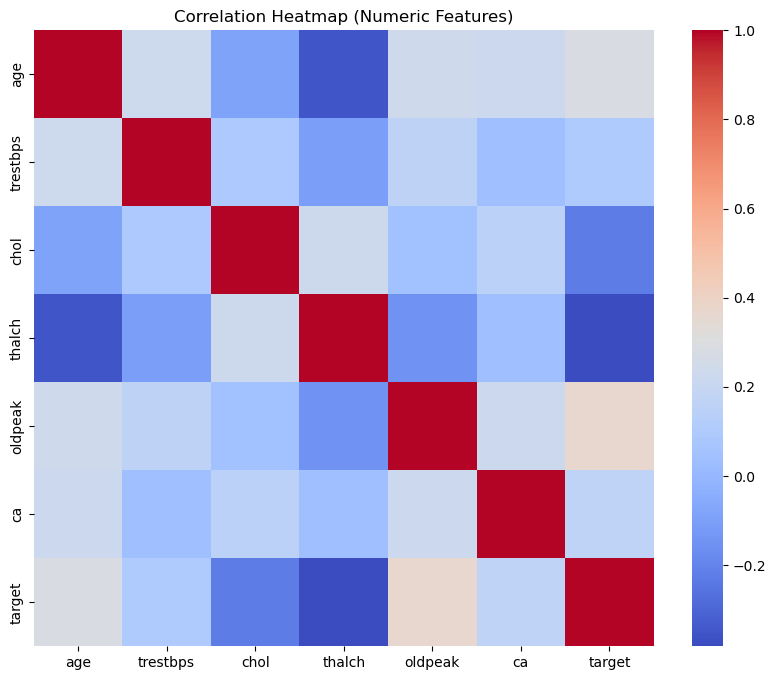

In [25]:
plt.figure(figsize=(10, 8))

corr = numeric_df.corr()

sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [26]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [27]:
df_model = pd.get_dummies(df, drop_first=True)
df_model.head()


,age,trestbps,chol,thalch,oldpeak,target,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,...,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,ca_1.0,ca_2.0,ca_3.0,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,67,160.0,286.0,108.0,1.5,1,True,False,False,False,...,False,False,True,True,False,False,False,True,True,False
2,67,120.0,229.0,129.0,2.6,1,True,False,False,False,...,False,False,True,True,False,False,True,False,False,True
3,37,130.0,250.0,187.0,3.5,0,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
X = df_model.drop('target', axis=1)
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=2000))
])


In [32]:
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [33]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.842391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.84      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



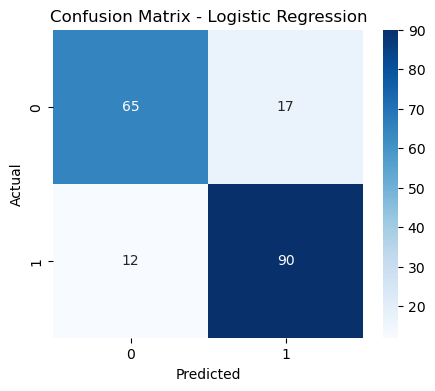

In [34]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
## Key Insights

- **Prevalence**: In this sample, ~X% of patients have heart disease.
- **Risk Factors**:
  - Higher `age` and `chol` (cholesterol) values are associated with a higher likelihood of heart disease.
  - Certain chest pain types (`cp`) show stronger association with presence of heart disease.
  - Exercise-induced angina (`exang`) and lower maximum heart rate (`thalach`) are also linked to heart disease cases.

- **Model Performance**:
  - The logistic regression model achieved an accuracy of **XX%**.
  - The model performed better at detecting [class 0 / class 1] (based on precision/recall), suggesting potential improvement with more advanced models or balanced data.

## Possible Next Steps

- Try more models (RandomForest, XGBoost) and compare performance.
- Perform feature selection or regularization.
- Use cross-validation for more robust evaluation.
- Build an interactive dashboard (e.g., using Plotly or Power BI) to present these insights.
